In [10]:
%run imports.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GPU available:  True
OS:  win32


<Figure size 432x288 with 0 Axes>

In [11]:
model=model_actions.load("checkpoints/bs_128_sch_plateau/bs_128_sch_plateau_epoch_160")

In [12]:
conv_w=[]
for name, param in model.named_parameters():
    if "conv" in name and param.size()[2] == 3:
        for i in param.tolist():
            for j in i:
                conv_w.append(j)

In [13]:
conv_w_flat = np.array(conv_w).flatten()

In [14]:
print(min(conv_w_flat))
print(max(conv_w_flat))
print(conv_w_flat.mean())
print(conv_w_flat.std())

-0.5033373236656189
0.4561920464038849
-0.00017370819079944112
0.00780817245143656


In [18]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

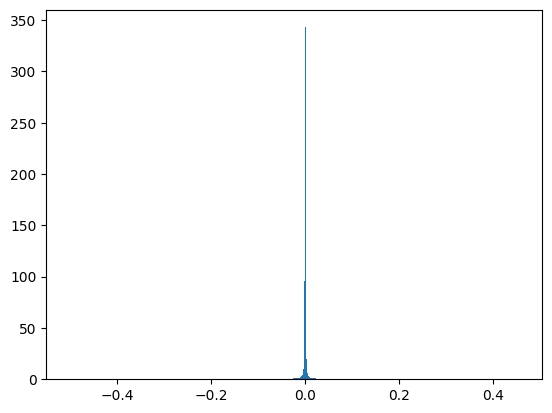

In [19]:
_=plt.hist(conv_w_flat, bins=500, density=True)